In [3]:
import numpy as np
import pandas as pd

# Question 1)

Load in the appropriate csv file as a pandas dataframe (batting.csv)

In [4]:
df = pd.read_csv('Batting.csv')
df.head(n=5)

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,Frank,Abercrombie,1850,1871,1,TRO,NaN,1,4,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,Bob,Addy,1842,1871,1,RC1,NaN,25,118,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,Art,Allison,1849,1871,1,CL1,NaN,29,137,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,Doug,Allison,1846,1871,1,WS3,NaN,27,133,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,Cap,Anson,1852,1871,1,RC1,NaN,25,120,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN


# Question 2)
Print out the dimensions and info about the dataframe you just created

In [5]:
df.shape

(102816, 25)

In [6]:
df.describe()

,birthYear,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102392.000000,101516.000000,79360.000000,102816.000000,94978.000000,66251.000000,100006.000000,96478.000000,66782.000000,76706.000000
mean,1932.991869,1964.262313,1.077838,51.343439,141.905511,18.815544,37.139930,6.289167,1.293252,2.813599,17.003975,2.976821,1.226008,13.067207,20.529712,1.105870,1.056057,2.299540,1.054101,2.981018
std,87.105524,38.856297,0.284366,47.121658,184.654492,28.242983,52.603757,9.662468,2.645770,6.304919,26.352011,7.717174,2.747377,20.746460,28.328542,2.780187,2.276251,4.241095,1.961732,4.735153
min,0.000000,1871.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1905.000000,1934.000000,1.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1945.000000,1973.000000,1.000000,34.000000,49.000000,4.000000,9.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,3.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1969.000000,1998.000000,1.000000,80.000000,231.000000,27.000000,58.000000,9.000000,1.000000,2.000000,24.000000,2.000000,1.000000,18.000000,29.000000,1.000000,1.000000,3.000000,1.000000,4.000000
max,1996.000000,2016.000000,5.000000,165.000000,716.000000,192.000000,262.000000,67.000000,36.000000,73.000000,191.000000,138.000000,42.000000,232.000000,223.000000,120.000000,51.000000,67.000000,19.000000,36.000000


### Question 3) 
How many players have hit 40 or more HRs in one single season? (Number only)

In [7]:
batting = df[(df['HR'] >=40)]
batting.count()
temp = batting['playerID'].unique()
temp.size

142

### Question 4)
How many players have hit 600 or more HRs for their career? (Dataframe with name and player first and last name only and amount of HRs)

In [8]:
gp_PID =df.groupby(['playerID', 'nameFirst', 'nameLast'])
gp_PID
g_PID= gp_PID.sum()
g_PID.reset_index(inplace=True)
g_PID.set_index(keys = ['nameFirst', 'nameLast'],inplace=True)
g_PID = g_PID[['HR']]
g_PID = g_PID[g_PID.HR >= 600]
g_PID.sort_values(by=['HR'], ascending=False)

,,HR
nameFirst,nameLast,
Barry,Bonds,762
Hank,Aaron,755
Babe,Ruth,714
Alex,Rodriguez,696
Willie,Mays,660
Ken,Griffey,630
Jim,Thome,612
Sammy,Sosa,609


# Question 5:
How many unique players have hit 40 2Bs or more, 10 3Bs or more, 200 Hits or more, and 30 HRs or more in one season? (Number Only)

In [9]:
Q5df = df[(df['2B'] >=40) & (df['3B'] >= 10) & (df['H'] >= 200) & (df['HR'] >= 30)]
uniqPL = Q5df['playerID'].unique()
len(uniqPL) 

11

# Question 6
How many players seasons have had 100 or more SBs? (Dataframe, first name, last name, yearID, number of SBs, ordered from descending SBs)

In [10]:
filtered = df[(df['SB'] >= 100)]
filtered
filtered.reset_index(inplace=True)
filtered.set_index(keys = ['yearID'],inplace=True)
filtered
filtered = filtered.sort_values(by='SB',ascending=False)
filtered[['nameFirst','nameLast','SB']]

,nameFirst,nameLast,SB
yearID,,,
1887,Hugh,Nicol,138.0
1982,Rickey,Henderson,130.0
1887,Arlie,Latham,129.0
1974,Lou,Brock,118.0
1887,Charlie,Comiskey,117.0
1887,John,Ward,111.0
1889,Billy,Hamilton,111.0
1891,Billy,Hamilton,111.0
1985,Vince,Coleman,110.0


# Question 7
How many players in the 1960s (yearID) have hit 200 or more HRs? (Dataframe, first name, last name, number of HRs, ordered descending by HR amt)

In [11]:
NEW = df[(df['yearID'] >= 1960 ) & (df['yearID'] < 1970)]
gp2 = NEW.groupby(['nameFirst', 'nameLast'])
NEW2 = gp2.sum()
NEW2
More200 = NEW2[(NEW2['HR'] >= 200)]
More200 = More200[['HR']]
More200.sort_values(by='HR',ascending=False)

,,HR
nameFirst,nameLast,
Harmon,Killebrew,393
Hank,Aaron,375
Willie,Mays,350
Frank,Robinson,316
Willie,McCovey,300
Frank,Howard,288
Norm,Cash,278
Ernie,Banks,269
Mickey,Mantle,256


# Question 8
Who has hit the most HRs in history? (Dataframe, first name, last name, HRs)

In [12]:
gp_PID =df.groupby(['playerID', 'nameFirst', 'nameLast'])
gp_PID
a_PID= gp_PID.sum()
a_PID.reset_index(inplace=True)
a_PID.set_index(keys = ['nameFirst', 'nameLast'],inplace=True)
b_PID = a_PID[['HR']]
m_PID = b_PID.nlargest(1, 'HR')
m_PID

,,HR
nameFirst,nameLast,
Barry,Bonds,762


# Question 9 
Who had the most hits (H) in the 1970s? (Dataframe)

In [13]:
Q9 = df[(df['yearID'] >= 1970 ) & (df['yearID'] < 1980)]
Q9
P = Q9.groupby(['playerID', 'nameFirst', 'nameLast']).sum()
P
P = P[['H']]
h_PID = P.nlargest(1, 'H')
h_PID

,,,H
playerID,nameFirst,nameLast,
rosepe01,Pete,Rose,2045


# Question 10
Top 5 highest OBP (on base percentage) with at least 500 PAs in 1977?  (Dataframe, first name, last name, OBP, ordered descending by OBP)

In [234]:
Q10 = df.fillna({'HBP': 0, 'SH': 0, 'SF': 0, 'IBB': 0, 'GIDP': 0})
Q10
Q10['PA']= Q10['AB']+ Q10['BB']+ Q10['HBP'] + Q10['SH'] + Q10['SF']
Q10['OBP']= ((Q10['H'] + Q10['BB'] + Q10['HBP']) / (Q10['AB']+ Q10['BB'] + Q10['HBP'] + Q10['SF']))
# OBP = (Hits + Walks + Hit by Pitch) / (At Bats + Walks + Hit by Pitch + Sacrifice Flies).
Q10C = Q10[(Q10['yearID'] == 1977)]
Q10C= Q10C[(Q10C['PA'] >= 500)]
top5 = Q10C.nlargest(5,'OBP')
answer=top5[['nameFirst','nameLast','OBP']]
answer

,nameFirst,nameLast,OBP
54603,Rod,Carew,0.448773
55273,Ken,Singleton,0.437788
55280,Reggie,Smith,0.426910
54820,Mike,Hargrove,0.420312
55095,Joe,Morgan,0.417054


# Question 11
11)	Top 8 highest averages in 2013 with at least 300 PAs? (Dataframe, first name, last name, average, descending by average)

In [248]:
df['avg']=df['H']/df['AB']
Q11 = df[(df['yearID'] ==2013)]
Q11
Q11 = Q11.fillna({'HBP': 0, 'SH': 0, 'SF': 0,'IBB': 0, 'GIDP': 0})
Q11['PA']= Q11['AB']+ Q11['BB']+ Q11['HBP']+Q11['SH']+Q11['SF']
Q11 = Q11[(Q11['PA']>= 300)]
Q11 =Q11[['nameFirst', 'nameLast','avg']]
Q11.nlargest(8, 'avg')

,nameFirst,nameLast,avg
97188,Miguel,Cabrera,0.347748
98062,Hanley,Ramirez,0.345395
97300,Michael,Cuddyer,0.331288
97825,Joe,Mauer,0.323596
98293,Mike,Trout,0.322581
97651,Chris,Johnson,0.321012
97437,Freddie,Freeman,0.319419
98043,Yasiel,Puig,0.319372


# Question 12 
Leaders in hits from 1940 up to and including 1949. (Dataframe, first name, last name, number of hits)

In [49]:
L = df[(df['yearID'] >= 1940) & (df['yearID'] <= 1949)]
L = L.groupby(['playerID', 'nameFirst', 'nameLast']).sum()
L.reset_index(inplace=True)
L.set_index(keys = ['nameFirst', 'nameLast'],inplace=True)
HL = L[['H']]
HL = HL.nlargest(5, 'H')
HL

,,H
nameFirst,nameLast,
Lou,Boudreau,1578
Bob,Elliott,1563
Dixie,Walker,1512
Stan,Musial,1432
Bobby,Doerr,1407


# Question 13
Who led MLB with the most hits the most times?  And how many times?  (Dataframe, Number of hits)

In [236]:
MH = df.groupby(['yearID'])
d= MH['H'].agg(np.max)
d=pd.DataFrame(d)
d.reset_index(inplace=True)
answer = pd.merge(df,d,
         how='inner', on=['yearID','H'])
gp13 = answer.groupby(['nameFirst', 'nameLast'])
gp13_2 = gp13.count()
gp13_2 = gp13_2[['H']]
gp13 =gp13_2.sort_values(by = 'H', ascending=False)
gp13.head(3)

,,H
nameFirst,nameLast,
Ichiro,Suzuki,7
Pete,Rose,7
Ty,Cobb,7


# Question 14)
Which players have played the most games for their careers?  Top 5 first name, last name, descending by games played presented as a dataframe

In [246]:
players = df.groupby(['nameFirst', 'nameLast','playerID']).sum()
players
gc= players[['G']]
gc
gc = gc.sort_values(by='G', ascending=False)
gc.reset_index(inplace=True)
gc= gc[['nameFirst', 'nameLast','G']]
gc.head(5)

,nameFirst,nameLast,G
0,Pete,Rose,3562
1,Carl,Yastrzemski,3308
2,Hank,Aaron,3298
3,Rickey,Henderson,3081
4,Ty,Cobb,3035


# Question 15
How many players have had more 3000 or more hits for their careers while also hitting 500 or more HRs?  Just a number is okay here

In [194]:
c = df.groupby(['playerID']).sum()
c = c[(c['H'] >= 3000) & (c['HR'] >= 500)]
len(c)

5

# Question 16 
How many HRs were hit during the entire 1988 season?  Just a number is okay here

In [63]:
a= df[(df['yearID']==1988)]
a =a['HR'].sum()
a

3180

# Question 17
17)	 Please filter out and show me the top 3 average seasons by Wade Boggs during his career in seasons in which he had at least 500 or more ABs.  Dataframe, first name, last name, average, descending by average

In [216]:
he = df[(df['nameFirst']=="Wade") & (df['nameLast']=='Boggs')]
he = he[(he['AB'] >= 500)]
he= he.sort_values(by='avg', ascending=False)
he[['nameFirst','nameLast','avg']].head(3)

,nameFirst,nameLast,avg
62316,Wade,Boggs,0.367534
65391,Wade,Boggs,0.366438
64335,Wade,Boggs,0.362976


# Question 18
Please filter out the top 10 OBPs for the 1995 season with 400 or more PAs, sorted by OBP descending.  Dataframe with first name, last name, OBP

In [218]:
Q18 = Q10[(Q10['yearID'] == 1995)]
Q18= Q18[(Q18['PA'] >= 400)]
top10_Q18 = Q18.nlargest(10,'OBP')
answer=top10_Q18[['nameFirst','nameLast','OBP']]
answer

,nameFirst,nameLast,OBP
73578,Edgar,Martinez,0.478873
73996,Frank,Thomas,0.454405
73611,Mark,McGwire,0.440758
73999,Jim,Thome,0.438061
73002,Barry,Bonds,0.431496
73875,Tim,Salmon,0.429467
73145,Chili,Davis,0.429119
73560,Dave,Magadan,0.427553
73495,Chuck,Knoblauch,0.424483
73671,Tim,Naehring,0.414729


# Question 19

Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928?  I would like a dataframe with first name, last name, number of 3Bs

In [69]:
df_sub = df[(df['yearID']== 1922) | (df['yearID']== 1925) | (df['yearID']== 1926) | (df['yearID']== 1928)] 
df_sub = df_sub.groupby(['nameFirst','nameLast']).sum()
df_sub.reset_index(inplace=True)
df_sub
df_sub = df_sub[['nameFirst','nameLast','3B']]
df_sub = df_sub.sort_values(by='3B', ascending=False)
df_sub.head(1)

,nameFirst,nameLast,3B
237,Curt,Walker,59


# Question 20)
How many unique players have hit 30 or more HRs in season while also stealing (SB) 30 more or bases?  A number is okay here

In [339]:
q20 = df.groupby(['playerID','yearID'],as_index=False).sum()
q20 = q20[(q20['HR'] >= 30) & (q20['SB'] >= 30)]
q20 = q20['playerID'].unique()
len(q20)

38

# Question 21 
Who had the highest OBP is 1986 with 400 or more ABs? (Dataframe first name, last name, OBP)

In [221]:
Q21 = Q10[(Q10['yearID'] ==1986)]
Q21 = Q21[(Q21['AB'] >= 400)]
Q21 = Q21.nlargest(1,'OBP')
answer=Q21[['nameFirst','nameLast','OBP']]
answer

,nameFirst,nameLast,OBP
63320,Wade,Boggs,0.45283


# Question 22)
Same question but for 1997 and only in the NL (check league ID)? (Dataframe, first name, last name OBP)

In [253]:
Q22 = Q10[(Q10['yearID'] == 1997)]
Q22 = Q22[(Q22['lgID'] == 'NL')]
Q22 = Q22[(Q22['AB'] >= 400)]
Q22 = Q22[['nameFirst','nameLast','OBP']]
Q22= Q22.nlargest(1 ,'OBP')
Q22

,nameFirst,nameLast,OBP
76562,Larry,Walker,0.451807


# Question 23
Who had more than the league average HRs (for players with 500 or more ABs) in 2012 (filter out all players with less 500 ABs)? (Dataframe first name, last name, HR descending)

In [75]:
Q23= df[(df['AB'] >= 500) & (df['yearID'] == 2012)]
average= Q23['HR'].mean() 
average 
Q23= Q23[(Q23['HR'] > average)]
Q23 =Q23[['nameFirst', 'nameLast', 'HR']]
Q23 = Q23.sort_values(by='HR', ascending=False)
Q23.reset_index(inplace=True)
Q23

,index,nameFirst,nameLast,HR
0,95768,Miguel,Cabrera,44
1,96114,Josh,Hamilton,43
2,96081,Curtis,Granderson,43
3,95969,Edwin,Encarnacion,42
4,95728,Ryan,Braun,41
5,95952,Adam,Dunn,41
6,95687,Adrian,Beltre,36
7,96971,Josh,Willingham,35
8,95741,Jay,Bruce,34
9,96301,Adam,LaRoche,33


# Question 24 
Who is the youngest player to hit 50 or more HRs in a single season? (Dataframe, first name, last name, HRs, season)

In [132]:
G = df.groupby(['yearID','nameFirst','nameLast','birthYear']).sum()
Q24= G[(G['HR'] >= 50)]
Q24
Q24 = Q24[['HR']]
Q24.reset_index(inplace=True)
Q24['age'] = Q24['yearID']- Q24['birthYear']
Q24 = Q24.nsmallest(1,'age')
Q24= Q24[['yearID','nameFirst','nameLast',"HR"]]
Q24

,yearID,nameFirst,nameLast,HR
40,2007,Prince,Fielder,50


# Question 25 
Who are the five youngest players to hit 300 or more HRs for their career? (Dataframe, first name, last name, season they eclipsed more than 300 HRs)

In [341]:
df['age']=df['yearID']-df['birthYear']
yp=df.groupby(by=['playerID','nameFirst','nameLast','yearID','age'])['HR'].sum().groupby(level=[0]).cumsum()
yp=yp.reset_index()
yp=yp[(yp['HR']>=300)]
yp.groupby(['nameFirst','nameLast','yearID'],as_index=False)
yp = yp.sort_values(by=['age'])
yp = yp.nsmallest(5, 'age')
yp = yp[['nameFirst','nameLast','yearID']]
yp

,nameFirst,nameLast,yearID
43074,Andruw,Jones,2005
69369,Albert,Pujols,2008
64767,Mel,Ott,1937
73216,Alex,Rodriguez,2003
27852,Jimmie,Foxx,1935


# BONUS:
Graph total HRs per season using bar graph

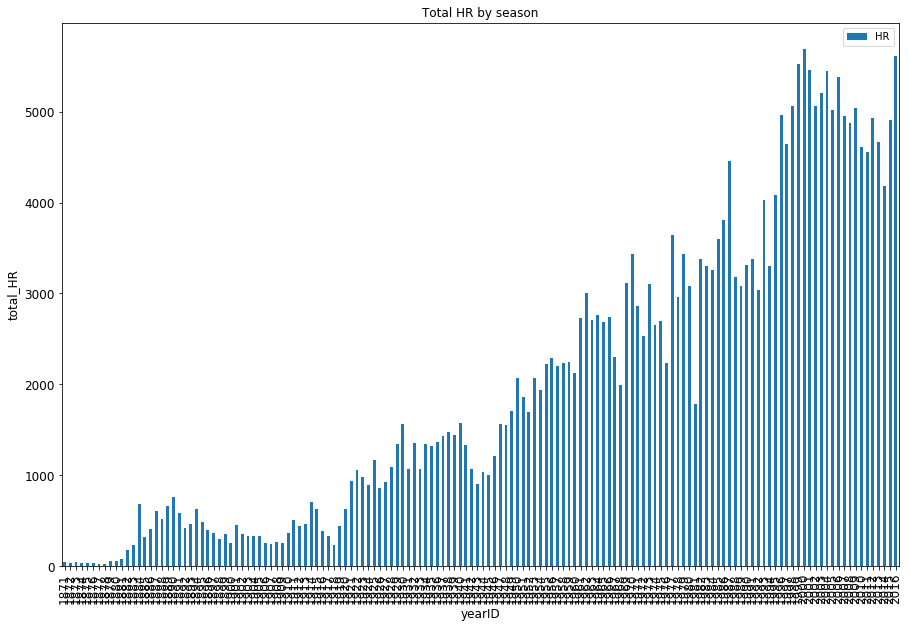

In [311]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
bonus= df.groupby(['yearID']).sum()
bonus= bonus[['HR']]
bonus.sort_values(by='HR', ascending=True)

ax = bonus.plot(kind='bar', title ="Total HR by season",figsize=(15,10),legend=True, fontsize=12)
ax.set_xlabel("yearID",fontsize=12)
ax.set_ylabel("total_HR",fontsize=12)
plt.show()

# BONUS: 
Using a line graph please graph the average HRs per AB (think about this) per season

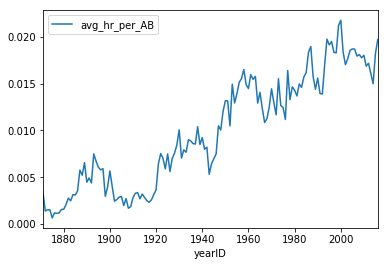

In [381]:
df['avg_hr_per_AB'] = (df['HR'] / df['AB'])
df['avg_hr_per_AB']
bonus2= df[['HR','AB', 'yearID','avg_hr_per_AB']]
bonus2= bonus2.groupby(['yearID'])
bonus2 = bonus2.mean()
bonus2= bonus2[['avg_hr_per_AB']]
bonus2
lines = bonus2.plot.line()
lines